# 1. Matrix Factorization for Network Embedding 

In [1]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from matplotlib import pyplot as plt 
np.random.seed(15)

In [2]:
#Load data
adjlist = nx.read_adjlist("karate_club.adjlist", nodetype=int)
karate_label = np.loadtxt("karate_label.txt")

In [6]:
adj = nx.to_numpy_array(adjlist)
label = karate_label[:,-1]

print(adj.shape)
print(label.shape)

(34, 34)
(34,)


In [7]:
#defining P, Q for matrix factorizaiton
d= 4
P = np.random.random((4,34))
Q = np.random.random((4,34))

In [8]:
zuzv = np.dot(P.T,Q)
zuzv.shape

(34, 34)

In [9]:
# loss function
def loss(a,b):
    return np.sum((a-b)**2)

In [10]:
loss(zuzv,adj)

1057.929366546701

In [11]:
epoch = 500
lr = 0.001

In [12]:
#Updating params 
loss_list = [0 for _ in range(epoch)]
for i in range(epoch):
    P -= lr *  np.dot(zuzv-adj,Q.T).T
    Q -= lr *  np.dot(zuzv-adj,P.T).T
    
    
    loss_list[i] = loss(zuzv,adj)
    zuzv = np.dot(P.T,Q)

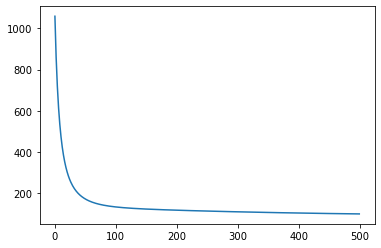

In [13]:
#plotting the loss
plt.plot(loss_list)

# T-SNE

- the membership number are located nearly when they have many relationship 
- it differs quite a lot when perplexity changes
- unlike the figure, label doesn't mean anyting (expressed by the color) 

In [14]:
ans = np.dot(adj,P.T)

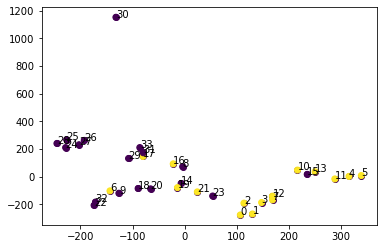

In [15]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100,perplexity=3)
transformed = model.fit_transform(ans)
xs = transformed[:,0]
ys = transformed[:,1]

for i in range(len(xs)):
    plt.scatter(xs[i],ys[i],c = label[i])
    plt.text(xs[i],ys[i],i)
plt.scatter(xs,ys,c=label)
#plt.text(xs,ys)

plt.show()
